In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [ ]:
data = pd.read_csv('20240505_integrated_data.csv')

In [ ]:
data

In [29]:
sns.pairplot(data)

In [40]:
data.columns

Index(['매매지수', '전세지수', '월세지수', '비아파트', '아파트 거래량', '아파트 인허가', '아파트 준공',
       '아파트 착공', '지가변동률', 'KB주택매매가격지수', 'KB주택전세가격지수', '아파트매매실거래가격지수',
       '아파트매매가격지수', '아파트전세가격지수', '아파트월세통합가격지수', '한국은행 기준금리', '정부대출금리',
       '국민주택채권1종(5년)', '현금통화량', '중앙은행 대 예금취급기관부채', '가계 통화량', '기업 통화량',
       '금융기관 통화량', '기타 통화량', '주택담보대출-예금취급기관', '주택담보대출-예금은행',
       '주택담보대출-비은행예금취급기관', '주택담보대출 - 주택금융공사 및 주택도시기금', '뉴스심리지수', '경제심리지수(원계열)',
       '경제심리지수(순환변동치)', '소비자물가지수(총지수)', '소비자물가지수(주택임차료)', '소비자물가지수(전세)',
       '소비자물가지수(월세)', '생산자물가지수', '수입물가지수', '수출물가지수', '기대인플레이션'],
      dtype='object')

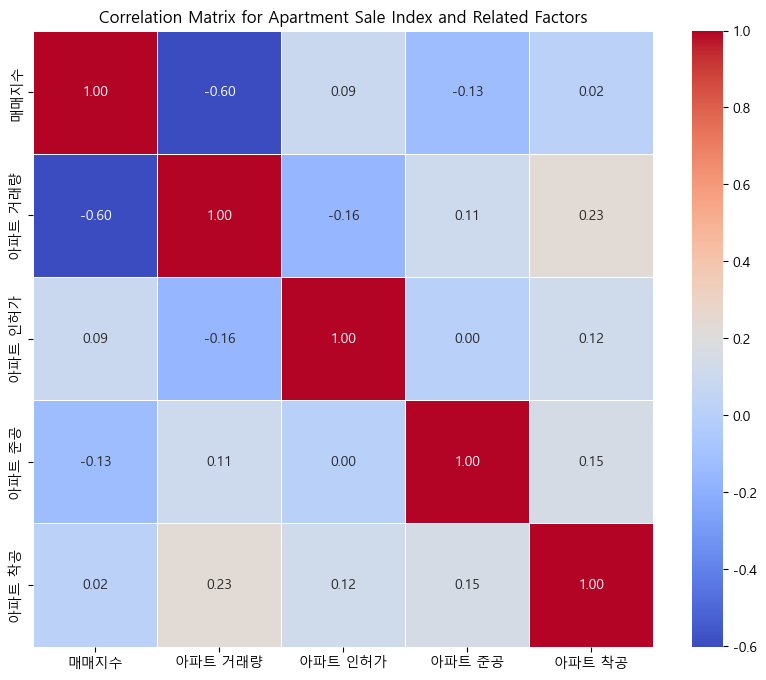

In [21]:

# Selecting relevant columns for analysis
relevant_columns = ['매매지수', '아파트 거래량', '아파트 인허가', '아파트 준공', '아파트 착공']
analysis_data = data[relevant_columns]

# Calculating correlation matrix
correlation_matrix = analysis_data.corr()

# Plotting the heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Apartment Sale Index and Related Factors')
plt.show()


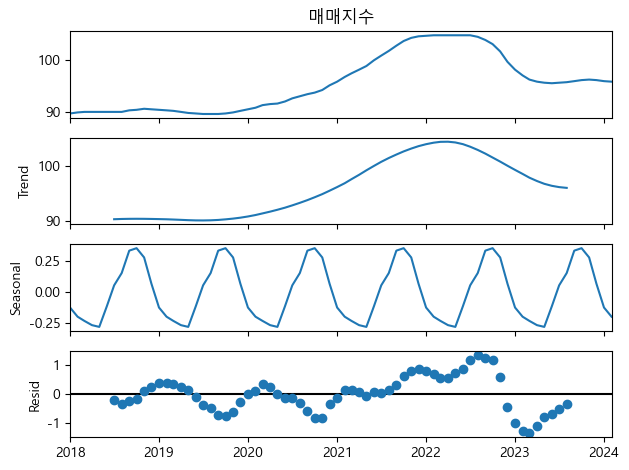

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert '날짜' column to datetime
data['날짜'] = pd.to_datetime(data['날짜'])

# Set '날짜' as the index of the dataframe
data.set_index('날짜', inplace=True)

# Perform seasonal decomposition on '매매지수'
result = seasonal_decompose(data['매매지수'], model='additive')

# Plotting the decomposition results
decomposition_fig = result.plot()
plt.show()


### 추세(Trend): 
시간에 따른 데이터의 장기적인 경향을 보여줍니다. 추세선은 매매지수의 전반적인 상승 또는 하락 추세를 나타냅니다.
### 계절성(Seasonal): 
특정 시간 구간(예: 월별, 분기별) 내에서 반복되는 패턴을 보여줍니다. 계절성 요소는 일정한 주기를 가지고 반복되는 변동을 나타내며, 부동산 시장의 계절적 변동을 반영할 수 있습니다.
### 잔차(Residual): 
추세와 계절성을 제거한 후 남는 변동성을 나타내며, 이는 모델에서 설명되지 않는 노이즈나 다른 영향들을 포함합니다.

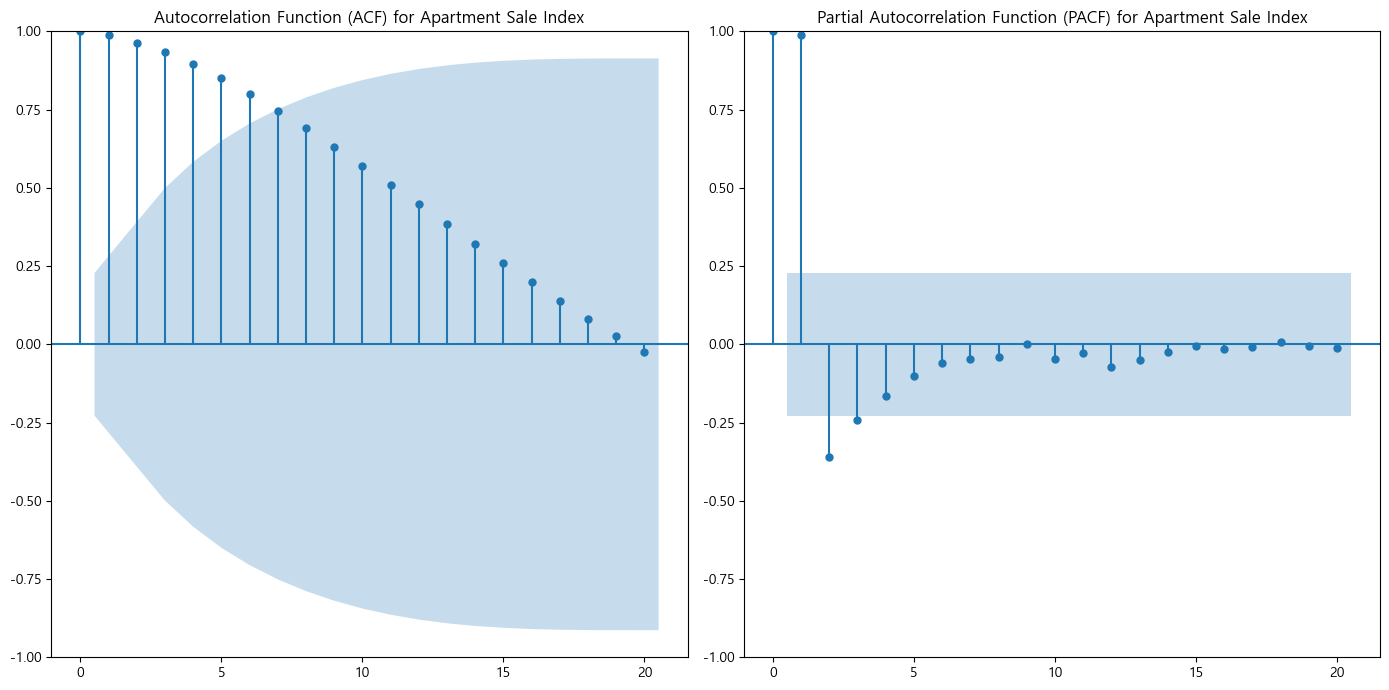

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting ACF and PACF
plt.figure(figsize=(14, 7))

plt.subplot(121)
plot_acf(data['매매지수'], ax=plt.gca(), lags=20, title='Autocorrelation Function (ACF) for Apartment Sale Index')

plt.subplot(122)
plot_pacf(data['매매지수'], ax=plt.gca(), lags=20, title='Partial Autocorrelation Function (PACF) for Apartment Sale Index')

plt.tight_layout()
plt.show()


### 자기상관 함수 (ACF): 
자기상관 함수 (ACF): 시계열 데이터 내의 현재 값과 과거 값들 사이의 선형 관계를 측정합니다. 이는 시차에 따른 데이터 포인트 간의 상관 관계를 나타냅니다.
초기 몇 개의 시차에서 상당한 양의 상관관계를 보여주고 있습니다. 이는 매매지수가 이전 시간대의 값에 영향을 받고 있음을 나타냅니다. 시차가 증가함에 따라 상관관계는 점차 감소합니다.
### 부분 자기상관 함수 (PACF): 
부분 자기상관 함수 (PACF): 특정 시차를 제외한 다른 모든 시차의 영향을 제거한 후의 상관 관계를 측정합니다. 이는 각 시차가 추가적으로 제공하는 정보의 양을 나타냅니다.
첫 번째와 두 번째 시차에서의 뚜렷한 급격한 감소를 보이고 있으며, 이후에는 상관관계가 유의미하게 낮아집니다. 이는 첫 번째 또는 두 번째 시차 이후의 값들이 매매지수 예측에 중요한 정보를 덜 제공함을 의미합니다.

### ARIMA (AutoRegressive Integrated Moving Average) 
ARIMA 모델은 시계열 데이터의 비계절적 변동을 모델링하기에 적합하며, 데이터의 추세와 자기상관을 활용합니다.

모델을 구성하기 전에, ARIMA 모델의 매개변수를 선택해야 합니다:

p (자기회귀 부분의 차수): PACF 그래프를 통해 결정할 수 있습니다.
d (차분의 차수): 시계열 데이터를 정상성을 갖도록 만드는 차분의 횟수입니다.
q (이동 평균 부분의 차수): ACF 그래프를 통해 결정할 수 있습니다.

In [24]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test to check stationarity
adf_test = adfuller(data['매매지수'])

# Display the ADF test results
adf_test_result = {
    'Test Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Critical Values': adf_test[4],
}

adf_test_result


{'Test Statistic': -1.8915479638274932,
 'p-value': 0.33604760227557995,
 'Critical Values': {'1%': -3.526004646825607,
  '5%': -2.9032002348069774,
  '10%': -2.5889948363419957}}

#### Augmented Dickey-Fuller(ADF) 검정 결과는 다음과 같습니다:

검정 통계량(Test Statistic): -1.8915
p-value: 0.3360
임계값(Critical Values): {1%: -3.526, 5%: -2.903, 10%: -2.589}
ADF 검정에서 p-value가 0.3360으로, 0.05보다 크기 때문에 귀무가설(시계열 데이터가 비정상적이다)을 기각할 수 없습니다. 이는 '매매지수' 시계열 데이터가 비정상적임을 의미하고, 따라서 차분을 통해 데이터를 정상성을 갖도록 변환할 필요가 있습니다.

In [26]:
# Applying first difference to the data
data_diff = data['매매지수'].diff().dropna()

# Perform ADF test on the first differenced data
adf_test_diff = adfuller(data_diff)

# Display the ADF test results for the differenced data
adf_test_diff_result = {
    'Test Statistic': adf_test_diff[0],
    'p-value': adf_test_diff[1],
    'Critical Values': adf_test_diff[4],
}

adf_test_diff_result


{'Test Statistic': -2.124471153026086,
 'p-value': 0.23478914422036218,
 'Critical Values': {'1%': -3.526004646825607,
  '5%': -2.9032002348069774,
  '10%': -2.5889948363419957}}

#### 1차 차분 후 Augmented Dickey-Fuller(ADF) 검정 결과는 다음과 같습니다:

검정 통계량(Test Statistic): -2.1245
p-value: 0.2348
임계값(Critical Values): {1%: -3.526, 5%: -2.903, 10%: -2.589}
1차 차분 후에도 p-value가 여전히 0.05 이상으로, 시계열 데이터가 여전히 비정상적임을 나타냅니다. 이는 추가적인 차분이 필요할 수 있음을 의미합니다. 이제 2차 차분을 수행하고 그 결과를 확인해 보겠습니다. ​

In [27]:
# Applying second difference to the data
data_diff_2 = data_diff.diff().dropna()

# Perform ADF test on the second differenced data
adf_test_diff_2 = adfuller(data_diff_2)

# Display the ADF test results for the second differenced data
adf_test_diff_2_result = {
    'Test Statistic': adf_test_diff_2[0],
    'p-value': adf_test_diff_2[1],
    'Critical Values': adf_test_diff_2[4],
}

adf_test_diff_2_result


{'Test Statistic': -6.433671604159484,
 'p-value': 1.6732187268077478e-08,
 'Critical Values': {'1%': -3.526004646825607,
  '5%': -2.9032002348069774,
  '10%': -2.5889948363419957}}

#### 1차 차분 후 Augmented Dickey-Fuller(ADF) 검정 결과는 다음과 같습니다:

검정 통계량(Test Statistic): -2.1245
p-value: 0.2348
임계값(Critical Values): {1%: -3.526, 5%: -2.903, 10%: -2.589}
1차 차분 후에도 p-value가 여전히 0.05 이상으로, 시계열 데이터가 여전히 비정상적임을 나타냅니다. 이는 추가적인 차분이 필요할 수 있음을 의미합니다. 이제 2차 차분을 수행하고 그 결과를 확인해 보겠습니다. ​

In [28]:
from statsmodels.tsa.arima.model import ARIMA

# Building the ARIMA model with p=2, d=2, q=2
arima_model = ARIMA(data['매매지수'], order=(2, 2, 2))
arima_result = arima_model.fit()

# Summarize the ARIMA model results
arima_result.summary()


c:\GitHub\URAILAB\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\GitHub\URAILAB\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\GitHub\URAILAB\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\GitHub\URAILAB\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\GitHub\URAILAB\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA param

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   매매지수   No. Observations:                   74
Model:                 ARIMA(2, 2, 2)   Log Likelihood                  12.604
Date:                Sun, 05 May 2024   AIC                            -15.208
Time:                        10:01:14   BIC                             -3.824
Sample:                    01-01-2018   HQIC                           -10.676
                         - 02-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1243     11.691      0.011      0.992     -22.789      23.038
ar.L2          0.0649      4.570      0.014      0.989      -8.892       9.022
ma.L1          0.1138     11.675      0.010      0.992     -22.769      22.997
ma.L2          0.0001      1.827   7.91e-05      1.000      -3.580       3.581
sigma2         0.0412      0.006      6.542      0.000       0.029       0.054
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.33
Prob(Q):                              0.98   Prob(JB):                         0.19
Heteroskedasticity (H):               4.06   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### ARIMA 모델의 결과를 요약하면 다음과 같습니다:

모델: ARIMA(2, 2, 2)
로그 우도 (Log Likelihood): 12.604
AIC: -15.208
BIC: -3.824
모델 계수의 p-value를 보면 대부분의 계수가 통계적으로 유의하지 않음을 나타냅니다. 이는 선택한 매개변수 p,d,q 가 이 데이터에 최적이 아닐 수 있음을 의미하며, 다른 매개변수 조합을 시도하거나 다른 시계열 모델을 고려할 필요가 있을 수 있습니다.

Ljung-Box 테스트, Jarque-Bera 테스트, 이분산성(Heteroskedasticity) 테스트 결과를 통해 모델의 적합도와 잔차의 정규성 및 등분산성을 평가할 수 있습니다. 여기서는 잔차의 등분산성에 문제가 있음을 암시하는 결과를 보여주고 있습니다.

이 정보를 바탕으로, 다음 단계는 모델의 매개변수를 조정하거나 다른 모델링 접근 방법을 시도하는 것이 좋겠습니다. 또한 예측을 수행해 보거나, 모델의 잔차를 분석하여 모델의 적합도를 더 자세히 평가할 수 있습니다. 다음으로 어떤 분석을 진행할지 알려주시면 그에 따라 진행하겠습니다.

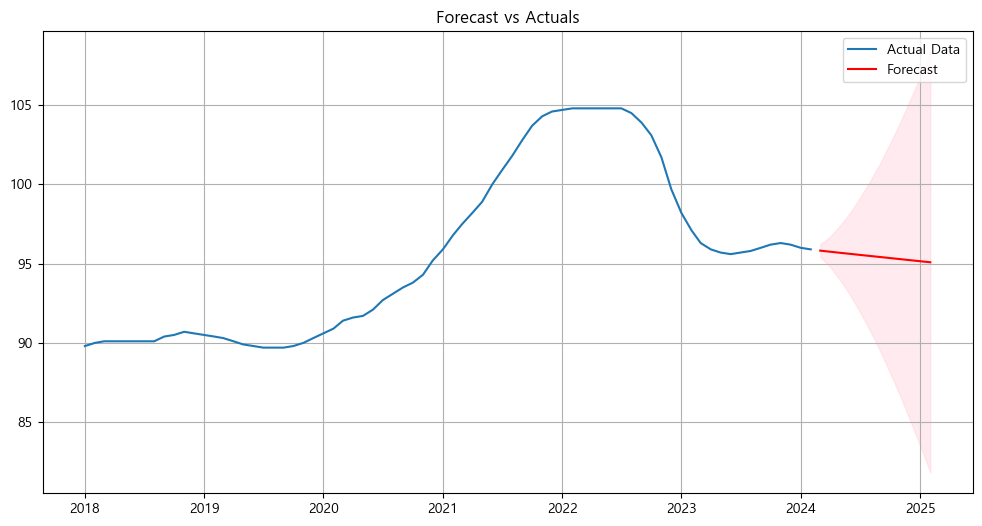

In [31]:
import numpy as np

# Forecasting the next 12 months using the ARIMA model
forecast_steps = 12
forecast_result = arima_result.get_forecast(steps=forecast_steps)

# Extracting forecast mean and confidence intervals
forecast_mean = forecast_result.predicted_mean
forecast_conf_int = forecast_result.conf_int()

# Ensuring the forecast index and data index have proper datetime types for plotting
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='MS')[1:]
forecast_mean.index = forecast_index
forecast_conf_int.index = forecast_index

# Verify if there are any NaNs or infinite values in the forecast confidence intervals
invalid_data_check = forecast_conf_int.isna().any().any() or not np.isfinite(forecast_conf_int.values).all()

# If there are no invalid data issues, try plotting again
if not invalid_data_check:
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['매매지수'], label='Actual Data')
    plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
    plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
    plt.title('Forecast vs Actuals')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Invalid data detected in forecast confidence intervals.")




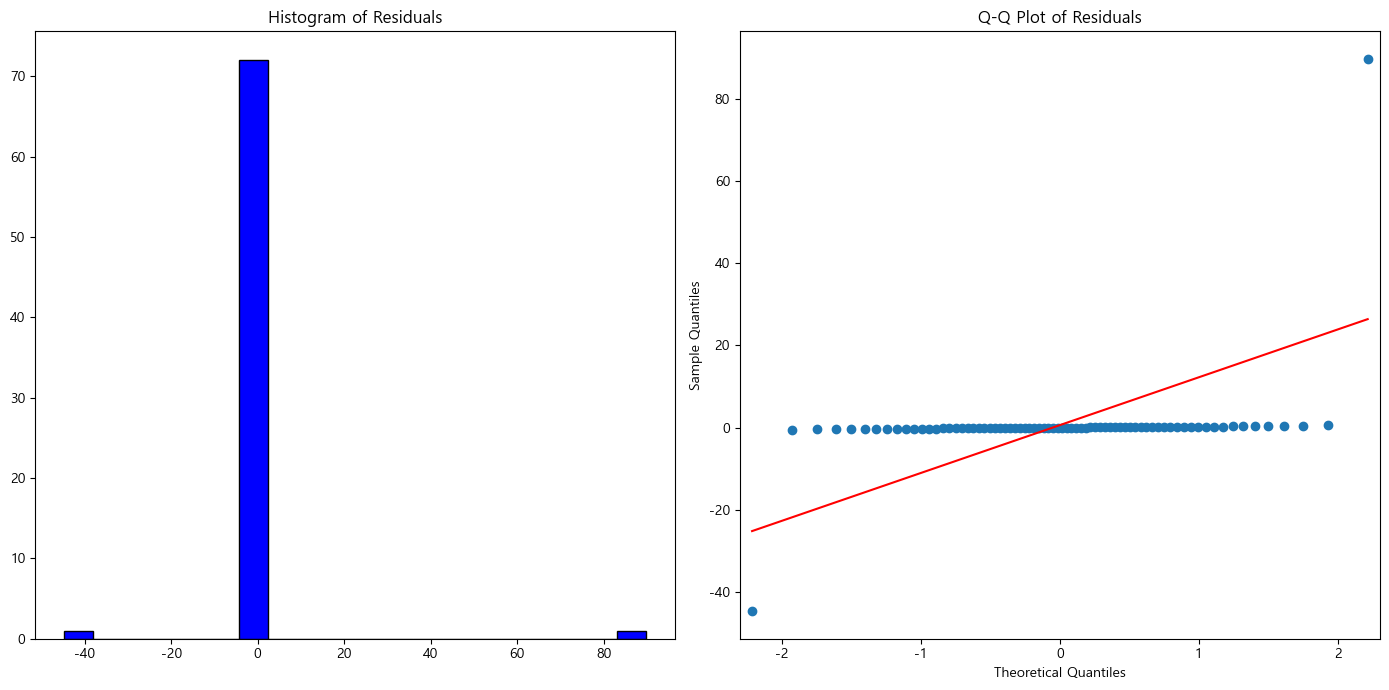

ShapiroResult(statistic=0.18014101154916695, pvalue=2.512059361543743e-18)

In [32]:
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot

# Extract residuals
residuals = arima_result.resid

# Plot histogram and QQ-plot of the residuals
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.hist(residuals, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Residuals')

plt.subplot(122)
qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk test for normality
shapiro_test = shapiro(residuals)
shapiro_test


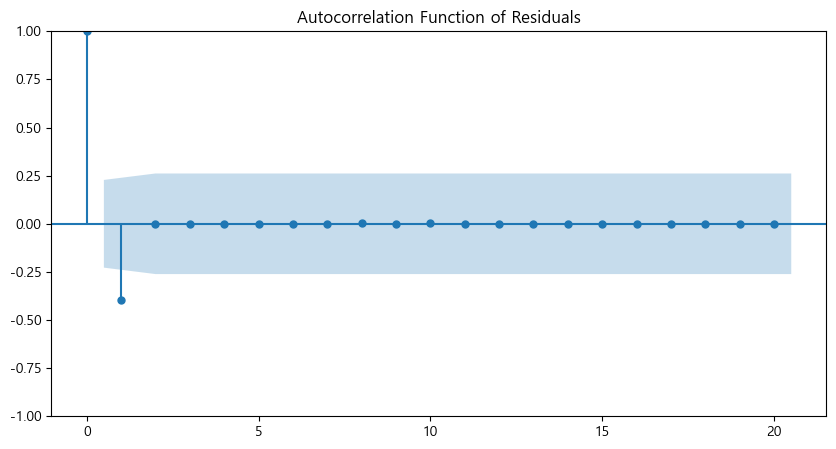

In [33]:
# Plotting the Autocorrelation Function (ACF) for residuals
plt.figure(figsize=(10, 5))
plot_acf(residuals, ax=plt.gca(), lags=20)
plt.title('Autocorrelation Function of Residuals')
plt.show()


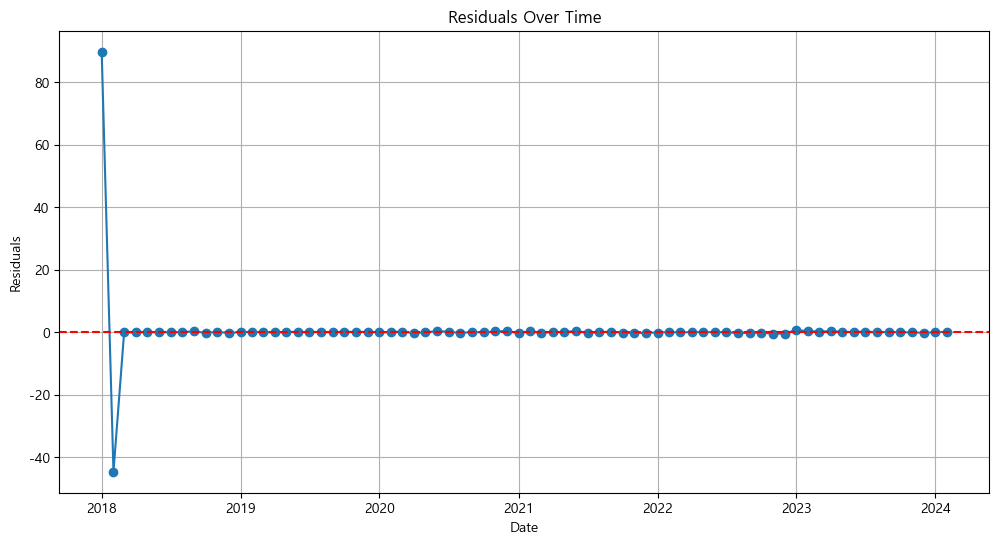

In [34]:
# Plot residuals over time with a line at zero for reference
plt.figure(figsize=(12, 6))
plt.plot(residuals.index, residuals, label='Residuals', marker='o')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


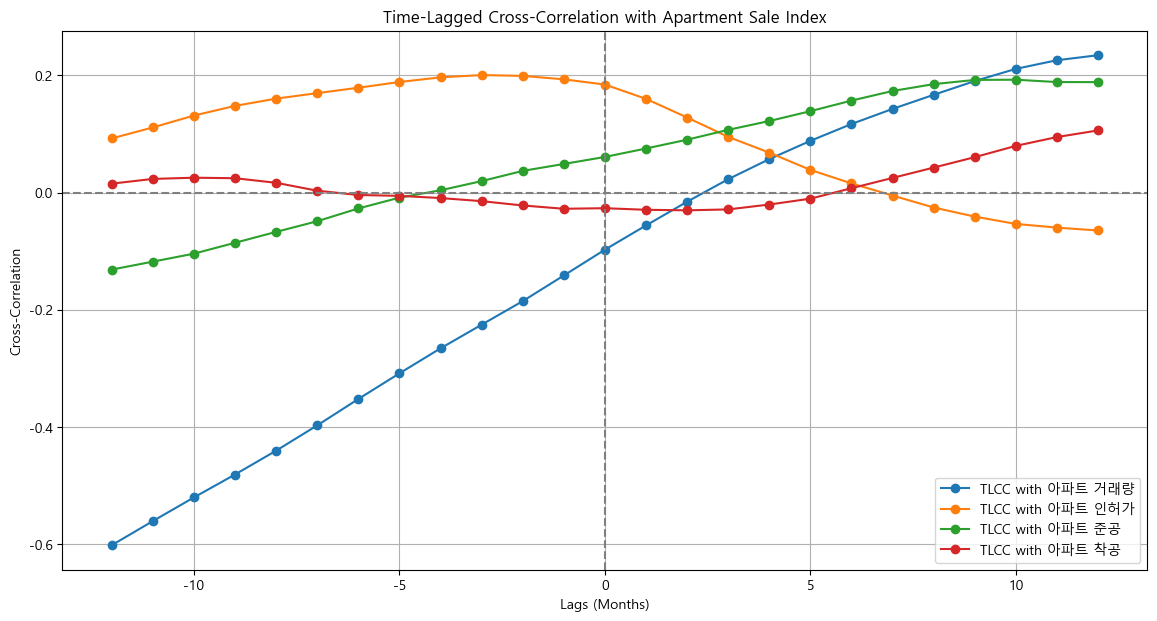

In [35]:
from statsmodels.tsa.stattools import ccf

# Selecting relevant columns for TLCC
columns = ['아파트 거래량', '아파트 인허가', '아파트 준공', '아파트 착공']
lags = range(-12, 13)  # Lags from -12 to 12 months

# Computing Time-Lagged Cross-Correlation for each variable with the Sale Index
tlcc_results = {col: ccf(data['매매지수'], data[col], adjusted=False)[:len(lags)] for col in columns}

# Plotting TLCC results
plt.figure(figsize=(14, 7))
for col, values in tlcc_results.items():
    plt.plot(lags, values, marker='o', label=f'TLCC with {col}')

plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Time-Lagged Cross-Correlation with Apartment Sale Index')
plt.xlabel('Lags (Months)')
plt.ylabel('Cross-Correlation')
plt.legend()
plt.grid(True)
plt.show()


In [36]:
from scipy.stats import kendalltau, pearsonr

# Calculating Kendall's tau and Pearson correlation coefficients
kendall_results = {col: kendalltau(data['매매지수'], data[col]) for col in columns}
pearson_results = {col: pearsonr(data['매매지수'], data[col]) for col in columns}

# Displaying Kendall's tau and Pearson results
kendall_results, pearson_results


({'아파트 거래량': SignificanceResult(statistic=-0.4710303902189753, pvalue=4.066004797190994e-09),
  '아파트 인허가': SignificanceResult(statistic=0.13281635308001288, pvalue=0.09723647366390033),
  '아파트 준공': SignificanceResult(statistic=-0.04228458584640939, pvalue=0.5975748807275832),
  '아파트 착공': SignificanceResult(statistic=0.011969961851410126, pvalue=0.8811684939826212)},
 {'아파트 거래량': PearsonRResult(statistic=-0.601242035295395, pvalue=1.4752999589918134e-08),
  '아파트 인허가': PearsonRResult(statistic=0.09219113215848698, pvalue=0.4346717596218799),
  '아파트 준공': PearsonRResult(statistic=-0.13143337093074445, pvalue=0.2643218127005341),
  '아파트 착공': PearsonRResult(statistic=0.015065073604652684, pvalue=0.8986273376560435)})